<h2 > <mark style="color:blue;"> Basic Python: Encoding, Scaling, Loop, Dataframe </mark></h2>

<h3 > <mark style="color:blue;">1. Import Library </mark></h3>
- https://docs.python.org/3/library/index.html

<p><mark>1.1 Pandas</br></mark>
This is one of the open-source Python libraries which is mainly used in Data Science and machine learning subjects. This library mainly provides data manipulation and analysis tool, which are used for analyzing data using its powerful data structures for manipulating numerical tables and time series analysis.</p>

<p><mark>1.2 Numpy</br></mark>
In Python, NumPy is another library that is used for mathematical functions. The NumPy library is popular for array and matrix processing using a set of mathematical functions.  This library is mostly used in machine learning computations.</p>

In [1]:
import pandas as pd
import numpy as np

<h3 > <mark style="color:blue;">2. Encoding Techniques</mark></h3>

- <p> In this section, You will learn about several encoding techniques, which are strategies for dealing with categorical data in a dataset. The majority of machine learning algorithms only work with numerical data since they use mathematical approaches to conduct operations on the data. It is crucial to transform category data, which is often in string form, into numerical data since many machine learning algorithms only take numerical values.</strong></p>

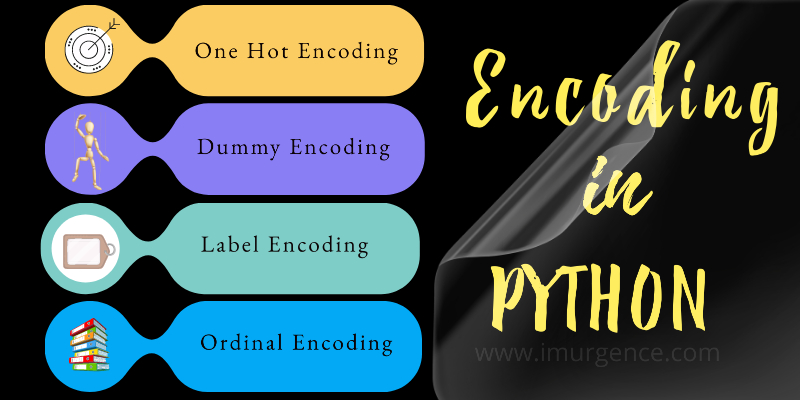

In [2]:
df = pd.read_csv('mall_customers.csv') # Read CSV file in dataframe

In [3]:
df.head() #view data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape # view data size (200,5) means: 200 rows and 5 column

(200, 5)

In [5]:
df.info() # view info, like datatypes record size and nullable or not

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df1=df.copy() # make df1 from coping df dataframe

In [7]:
df2=df.copy()

<h4 > <mark style="color:blue;">2.1 Label Encoding</mark></h4>

In [8]:
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [9]:
df.columns 

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [10]:
import warnings 
warnings.filterwarnings('ignore')  # for ignore unnecessary Warnings

from pandas.core.dtypes.common import is_numeric_dtype

for col in df.columns:
    if is_numeric_dtype(df[col]): # if datatypes of collumn are numerical , it will continue, otherwise encode.
        continue
    else:
        df1[col] = le.fit_transform(df1[col])


In [11]:
df1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


- <p> Here Gender column has two value: <b>Male, Famale</b>. For Label Encoding, it will short by alphabate of values first letter, like :<b> F,M </b>.</br>
- Each category in label encoding is given a value between 0 and n, where n is the number of categories in the column.</p>

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Gender                  200 non-null    int32
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
dtypes: int32(1), int64(4)
memory usage: 7.2 KB


In [13]:
df2.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<h3 > <mark style="color:blue;">3. Scaling Techniques</mark></h3>

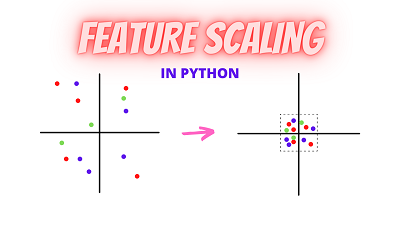

<mark> 3.1 Absolute Maximum Scaling</mark> </br>
<mark> 3.2 Min-Max Scaling</mark></br>
<mark> 3.3 Normalization</mark></br>
<mark> 3.4 Standardization</mark></br>
<mark> 3.5 Robust Scaling </mark>

<h4 > <mark style="color:blue;">3.2 MinMaxScaler</mark></h4>

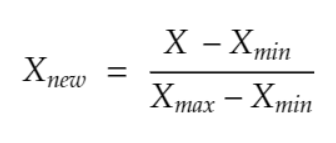

When using min-max, you must first take the dataset's minimum value out of the total set of values before dividing that result by the dataset's range (maximum-minimum). In this example, as opposed to the last one, when it was between -1 and +1, your dataset will always fall between 0 and 1. Once more, this method is susceptible to outliers.

In [14]:
from sklearn.preprocessing import MinMaxScaler
mmscaler=MinMaxScaler()

In [15]:
df2['Annual Income (k$)']=mmscaler.fit_transform(df2[['Annual Income (k$)']])

In [16]:
df2['Spending Score (1-100)']=mmscaler.fit_transform(df2[['Spending Score (1-100)']])

In [17]:
df2.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,0.000000,0.387755
1,2,Male,21,0.000000,0.816327
2,3,Female,20,0.008197,0.051020
3,4,Female,23,0.008197,0.775510
4,5,Female,31,0.016393,0.397959


In [18]:
df3=df.copy()

In [19]:
df3.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<h5> <mark>We Can also use loop for this purpose </mark></h5>

In [20]:
from sklearn.preprocessing import MinMaxScaler
mmscaler=MinMaxScaler()

In [21]:
from pandas.core.dtypes.common import is_string_dtype

for coll in df3.columns[1:]: #df3.columns[1:] for except customerID column
    if is_string_dtype(df3[coll]):
        continue
    else:
        df3[coll] = mmscaler.fit_transform(df3[[coll]])

In [22]:
df3.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,0.019231,0.000000,0.387755
1,2,Male,0.057692,0.000000,0.816327
2,3,Female,0.038462,0.008197,0.051020
3,4,Female,0.096154,0.008197,0.775510
4,5,Female,0.250000,0.016393,0.397959


In [23]:
df4=df.copy() # copy df Dataset as df4

In [24]:
df4.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<h3 > <mark style="color:blue;">4. Lets try to seperate string and numerical column from Dataframe</mark></h3>

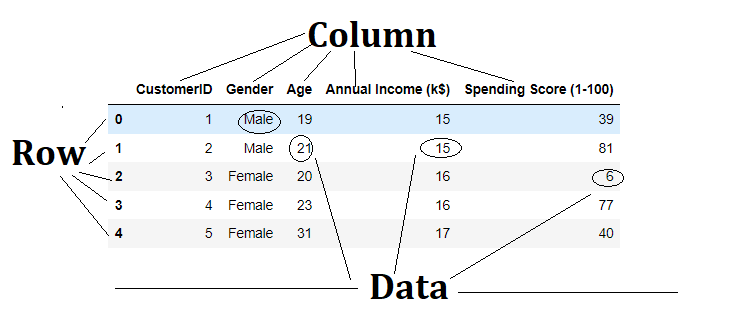

Pandas DataFrame is a two-dimensional, size-mutable tabular data format with named axes (rows and columns). A data frame is a two-dimensional data structure in which data is organized in rows and columns in a tabular form. Pandas DataFrame is made up of three major components: data, rows, and columns.

In [25]:
# Seperate String Column
str_colls=[]
for coll in df4.columns:
    if is_numeric_dtype(df4[coll]):
        continue
    else:
        str_colls.append(coll)

In [26]:
str_colls

['Gender']

In [27]:
# Seperate Numerical Column
num_colls=[]
for coll in df4.columns:
    if is_string_dtype(df4[coll]):
        continue
    else:
        num_colls.append(coll)

In [28]:
num_colls

['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

<h4 > <mark style="color:blue;">4.1 Lets Try to add new column in Dataframe df4</mark></h4>

 - Create an Custome column named profession

In [29]:
profession=['Doctor','Engineer','Sweeper','Driver','Business'] # create a list

In [30]:
profession

['Doctor', 'Engineer', 'Sweeper', 'Driver', 'Business']

In [31]:
import random
professions=[]
for i in range(40):
    # we need 200 data for dataframe, because our existing dataframe has 200 data
    # get random value from list to make 200 data (here 5 data has in profession list. so, 5*40=200 data)
    for j in profession:
        professions.append(random.sample(profession,1))

In [32]:
professions

[['Sweeper'],
 ['Engineer'],
 ['Business'],
 ['Business'],
 ['Doctor'],
 ['Sweeper'],
 ['Engineer'],
 ['Sweeper'],
 ['Sweeper'],
 ['Business'],
 ['Sweeper'],
 ['Sweeper'],
 ['Business'],
 ['Driver'],
 ['Sweeper'],
 ['Driver'],
 ['Engineer'],
 ['Business'],
 ['Engineer'],
 ['Driver'],
 ['Driver'],
 ['Business'],
 ['Sweeper'],
 ['Engineer'],
 ['Engineer'],
 ['Business'],
 ['Sweeper'],
 ['Sweeper'],
 ['Doctor'],
 ['Engineer'],
 ['Doctor'],
 ['Sweeper'],
 ['Sweeper'],
 ['Business'],
 ['Business'],
 ['Driver'],
 ['Driver'],
 ['Engineer'],
 ['Driver'],
 ['Doctor'],
 ['Sweeper'],
 ['Engineer'],
 ['Engineer'],
 ['Doctor'],
 ['Engineer'],
 ['Doctor'],
 ['Business'],
 ['Business'],
 ['Business'],
 ['Sweeper'],
 ['Business'],
 ['Business'],
 ['Driver'],
 ['Sweeper'],
 ['Sweeper'],
 ['Doctor'],
 ['Sweeper'],
 ['Engineer'],
 ['Sweeper'],
 ['Doctor'],
 ['Sweeper'],
 ['Business'],
 ['Engineer'],
 ['Sweeper'],
 ['Engineer'],
 ['Driver'],
 ['Sweeper'],
 ['Doctor'],
 ['Engineer'],
 ['Engineer'],
 ['Doct

In [33]:
profession=pd.DataFrame(professions,columns=['Profession']) # make an dataframe

In [34]:
profession

,Profession
0,Sweeper
1,Engineer
2,Business
3,Business
4,Doctor
...,...
195,Business
196,Business
197,Business
198,Driver


In [35]:
df4['Profession']=profession # add Profession in df4 dataframe

In [36]:
df4.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Profession
0,1,Male,19,15,39,Sweeper
1,2,Male,21,15,81,Engineer
2,3,Female,20,16,6,Business
3,4,Female,23,16,77,Business
4,5,Female,31,17,40,Doctor


In [37]:
df4.to_csv('mall_customers1.csv')

In [38]:
df_mall_customers = pd.read_csv('mall_customers1.csv')

In [39]:
df_mall_customers.head()

,Unnamed: 0,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Profession
0,0,1,Male,19,15,39,Sweeper
1,1,2,Male,21,15,81,Engineer
2,2,3,Female,20,16,6,Business
3,3,4,Female,23,16,77,Business
4,4,5,Female,31,17,40,Doctor


- Let check above dataframe, there added another column autometically,that is 'Unnamed'

##### So, we need to follow as following step for this purpose. Like, index=False

In [40]:
df4.to_csv('mall_customers2.csv',index=False)

In [41]:
df_mall_customers2 = pd.read_csv('mall_customers2.csv')

In [42]:
df_mall_customers2.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Profession
0,1,Male,19,15,39,Sweeper
1,2,Male,21,15,81,Engineer
2,3,Female,20,16,6,Business
3,4,Female,23,16,77,Business
4,5,Female,31,17,40,Doctor
5,6,Female,22,17,76,Sweeper
6,7,Female,35,18,6,Engineer
7,8,Female,23,18,94,Sweeper
8,9,Male,64,19,3,Sweeper
9,10,Female,30,19,72,Business


In [43]:
df_mall_customers2.head(10).T

,0,1,2,3,4,5,6,7,8,9
CustomerID,1,2,3,4,5,6,7,8,9,10
Gender,Male,Male,Female,Female,Female,Female,Female,Female,Male,Female
Age,19,21,20,23,31,22,35,23,64,30
Annual Income (k$),15,15,16,16,17,17,18,18,19,19
Spending Score (1-100),39,81,6,77,40,76,6,94,3,72
Profession,Sweeper,Engineer,Business,Business,Doctor,Sweeper,Engineer,Sweeper,Sweeper,Business


In [44]:
df_mall_customers2.info() # check datatype of dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
 5   Profession              200 non-null    object
dtypes: int64(4), object(2)
memory usage: 9.5+ KB
